In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# paper of GAN by Ian Goodfellow
# https://github.com/GodLovesJonny/Paper-Lib/blob/master/GAN/1406.2661%20Generative%20Adversarial%20Nets.pdf

In [3]:
# Hyper Parameters
args = {
    'epochs': 10,
    'batch_size': 64,
    'lr_G': 0.0001,
    'lr_D': 0.0001,
    'num_ideas': 5,
    'art_components': 15,
}

In [4]:
PAINT_POINTS = np.vstack([np.linspace(-1, 1, args['art_components']) for _ in range(args['batch_size'])])
PAINT_POINTS.shape

(64, 15)

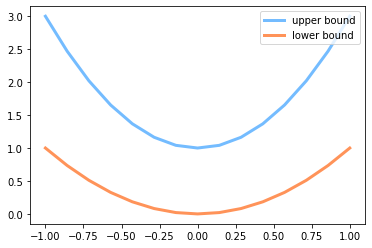

In [5]:
# show the painting range
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [6]:
 # painting from the real artist (real target)
def artist_works():
    a = np.random.uniform(1, 2, size=args['batch_size'])[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a - 1)
    paintings = torch.from_numpy(paintings).float()
    return paintings

In [7]:
G = nn.Sequential(
    nn.Linear(args['num_ideas'], 128),
    nn.ReLU(),
    nn.Linear(128, args['art_components']),
)

D = nn.Sequential(
    nn.Linear(args['art_components'], 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

In [8]:
opt_G = torch.optim.Adam(G.parameters(), lr=args['lr_G'])
opt_D = torch.optim.Adam(D.parameters(), lr=args['lr_D'])

In [9]:
plt.ion()

0


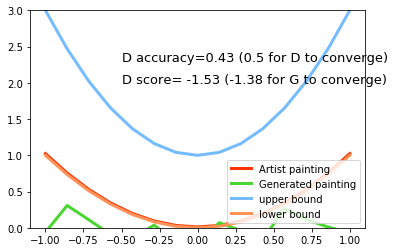

50


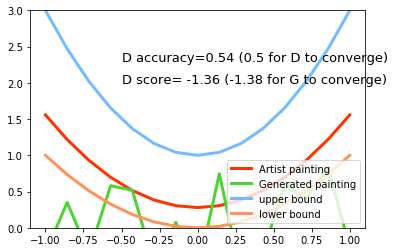

100


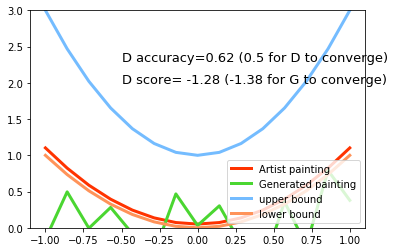

150


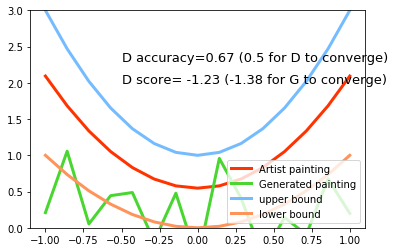

200


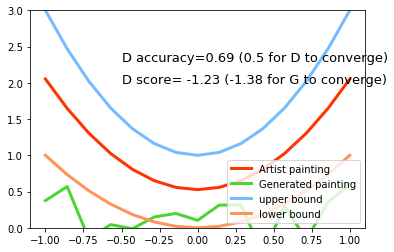

250


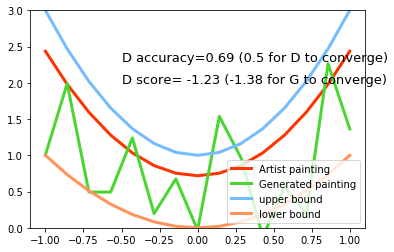

300


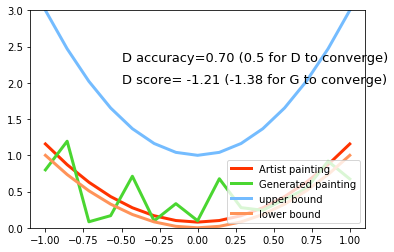

350


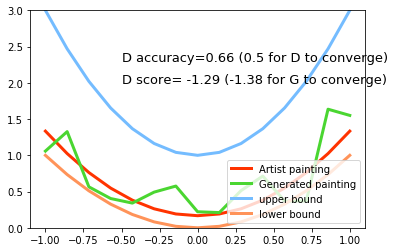

400


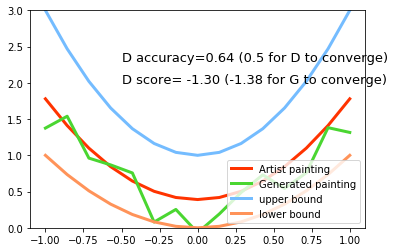

450


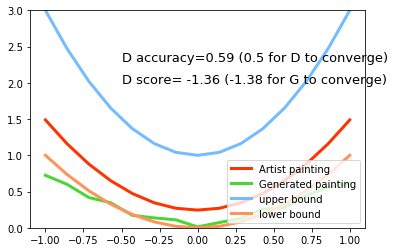

500


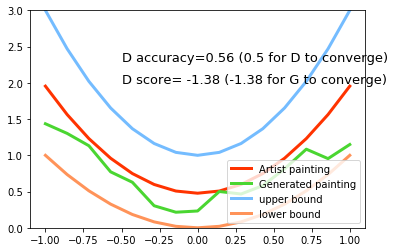

550


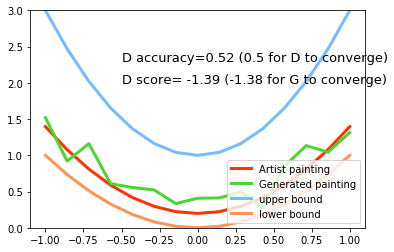

600


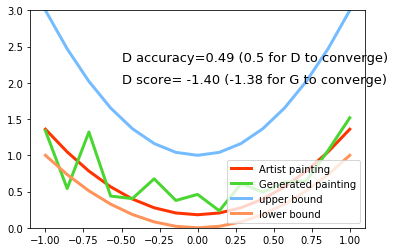

650


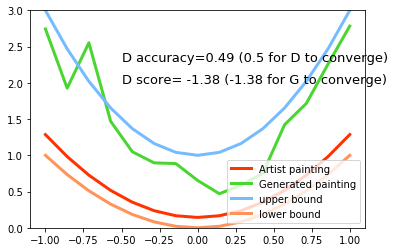

700


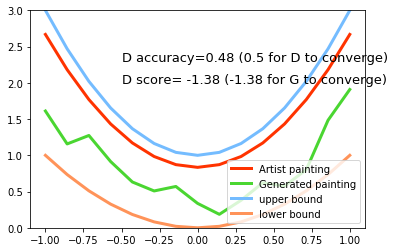

750


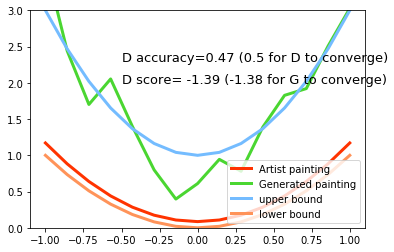

800


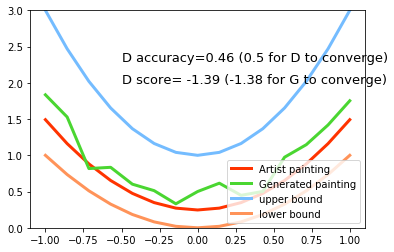

850


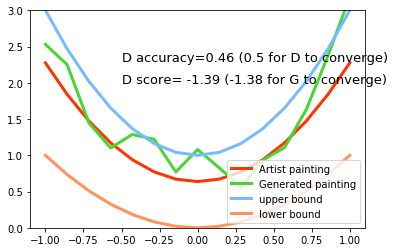

900


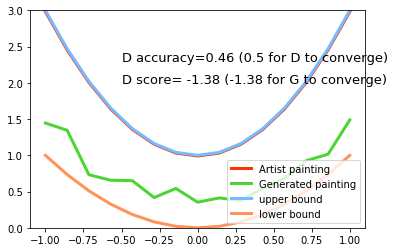

950


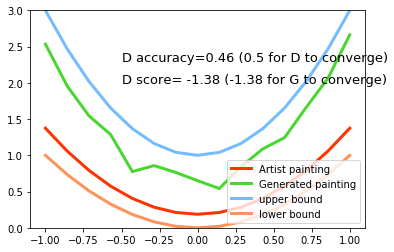

1000


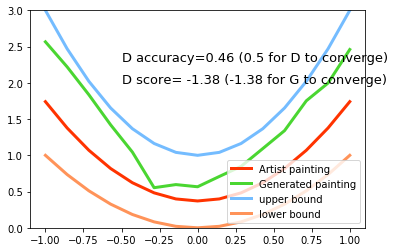

1050


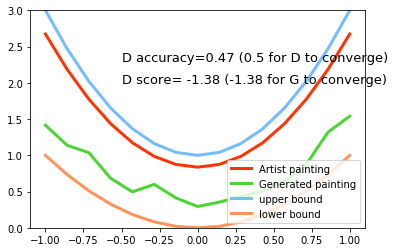

1100


1150


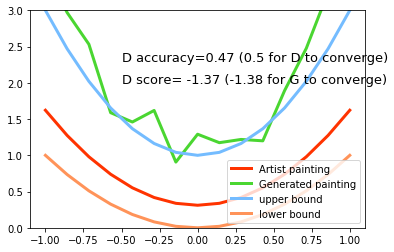

1200


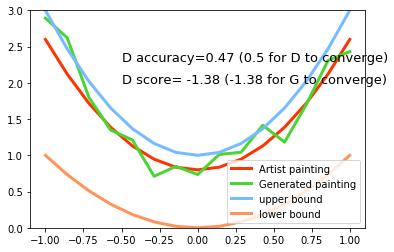

1250


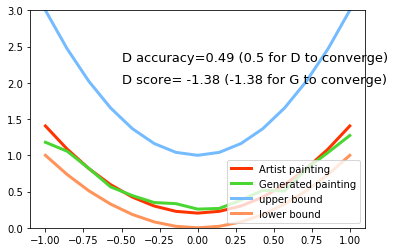

1300


1350


1400


1450


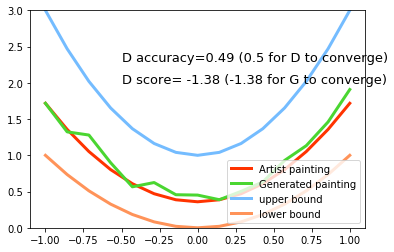

1500


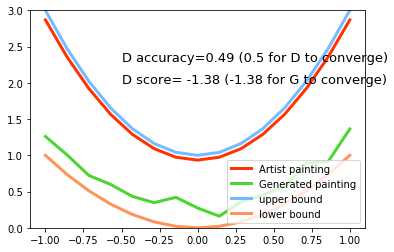

1550


1600


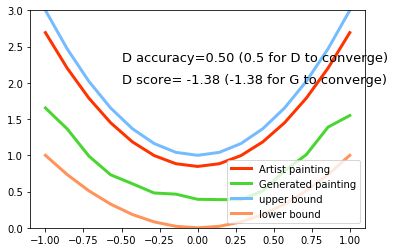

1650


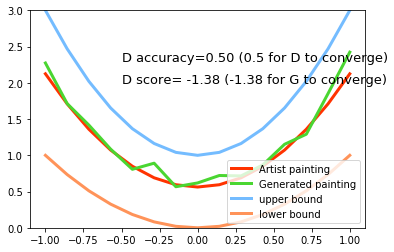

1700


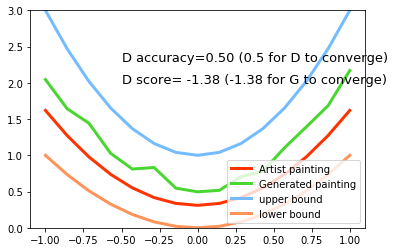

1750


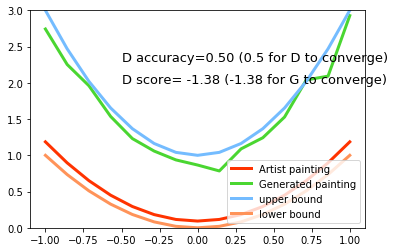

1800


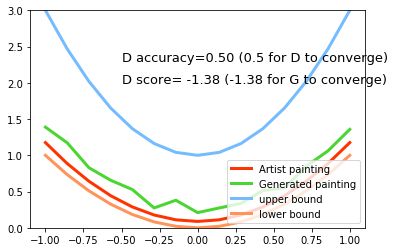

1850


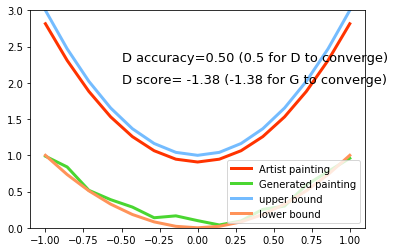

1900


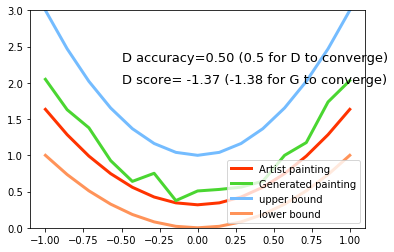

1950


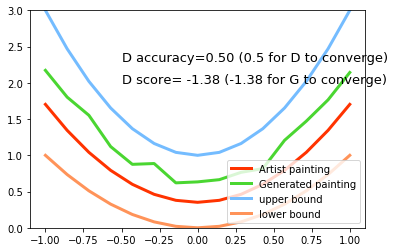

2000


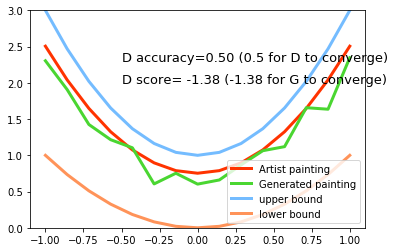

2050


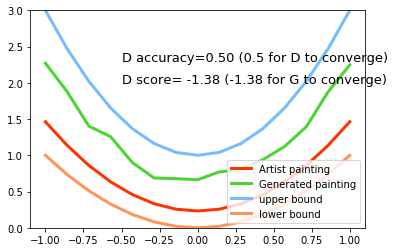

2100


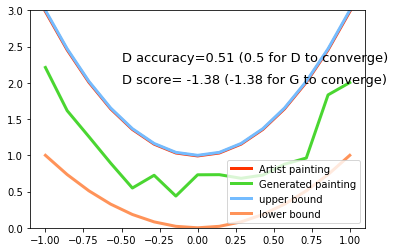

2150


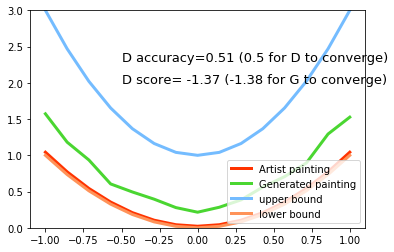

2200


2250


2300


2350


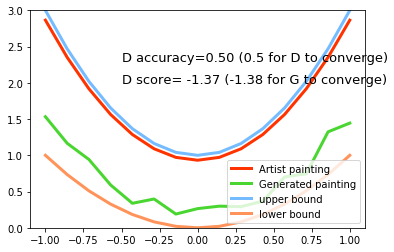

2400


2450


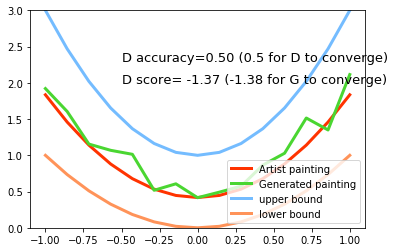

2500


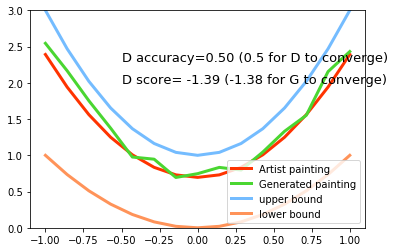

2550


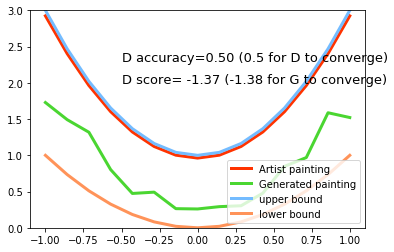

2600


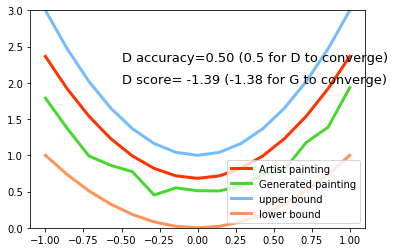

2650


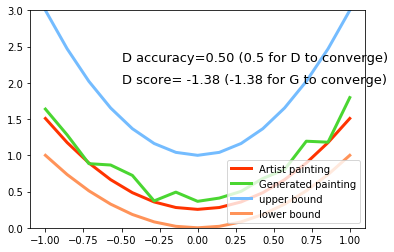

2700


2750


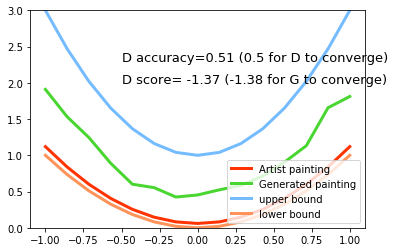

2800


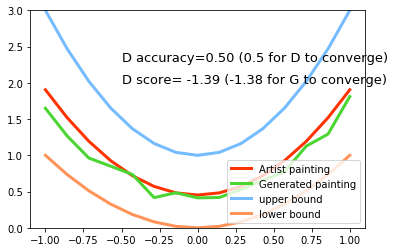

2850


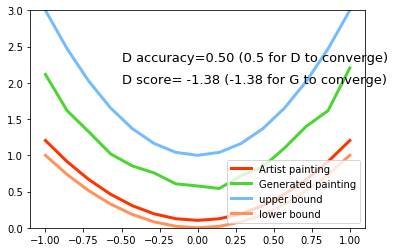

2900


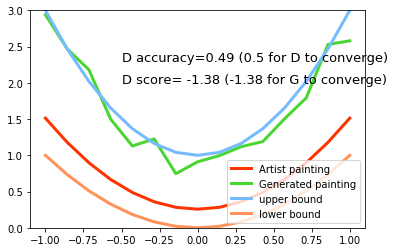

2950


3000


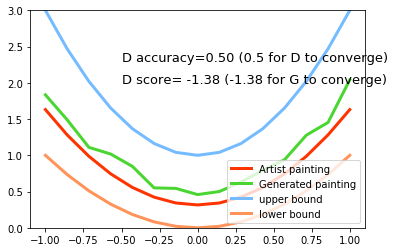

3050


3100


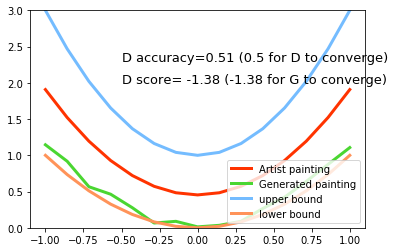

3150


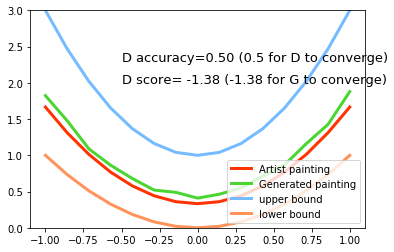

3200


3250


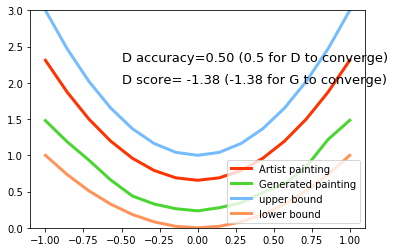

3300


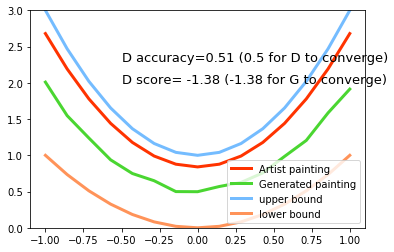

3350


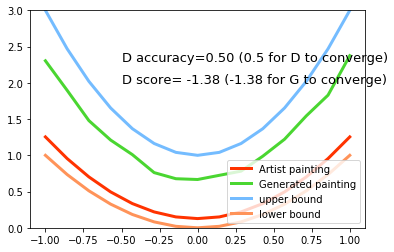

3400


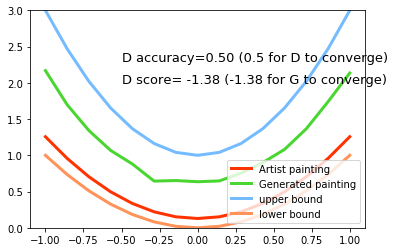

3450


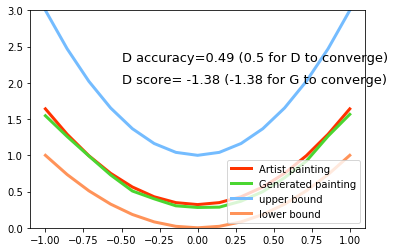

3500


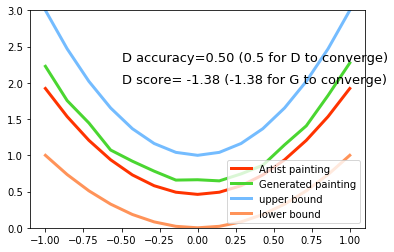

3550


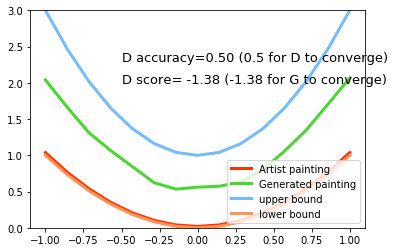

3600


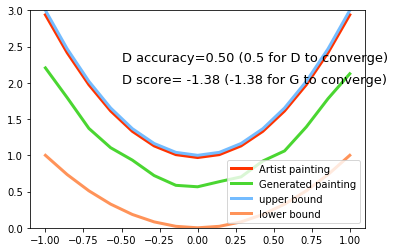

3650


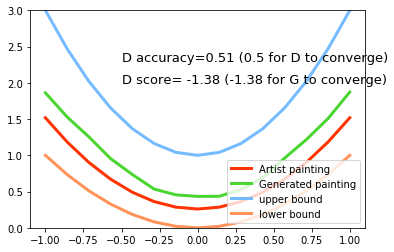

3700


3750


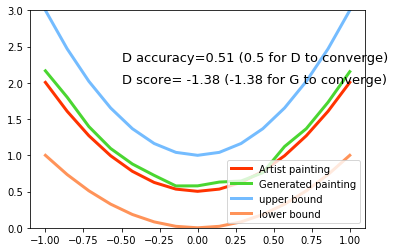

3800


3850


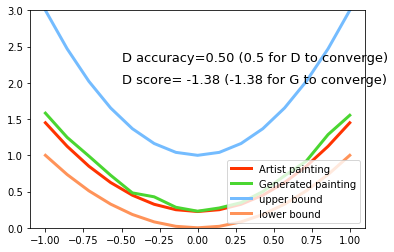

3900


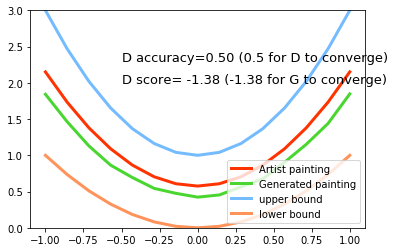

3950


4000


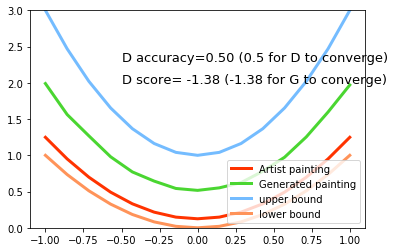

4050


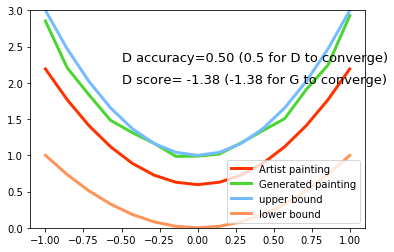

4100


4150


4200


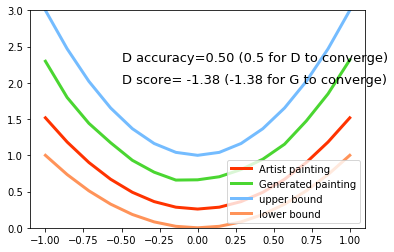

4250


4300


4350


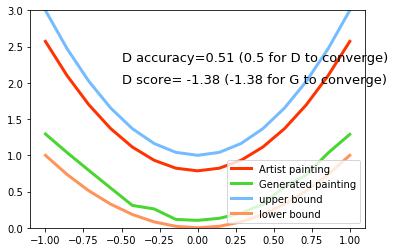

4400


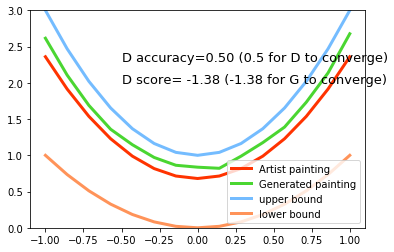

4450


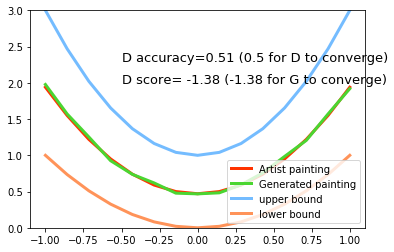

4500


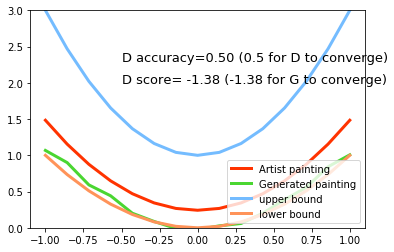

4550


4600


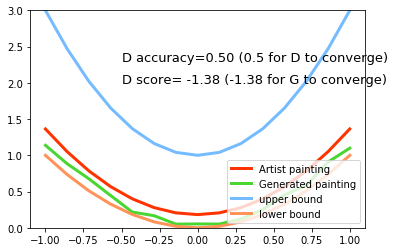

4650


4700


4750


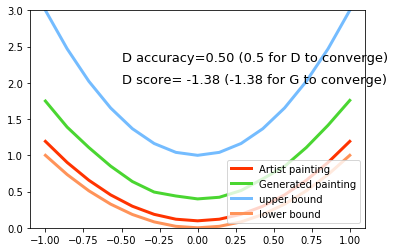

4800


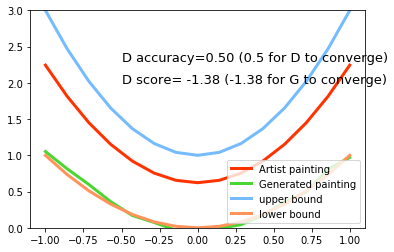

4850


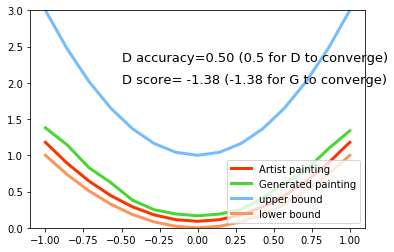

4900


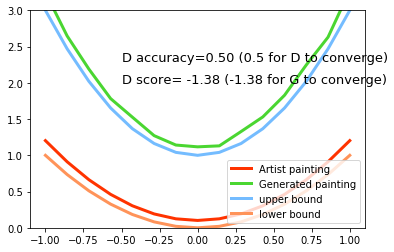

4950


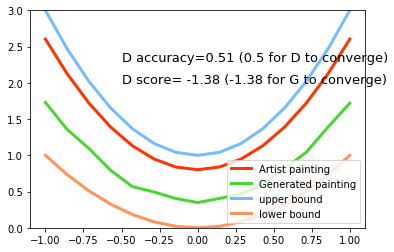

5000


5050


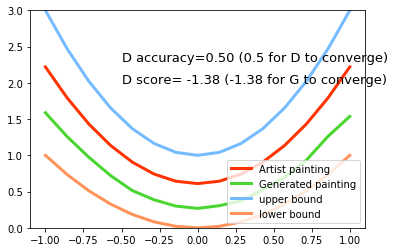

5100


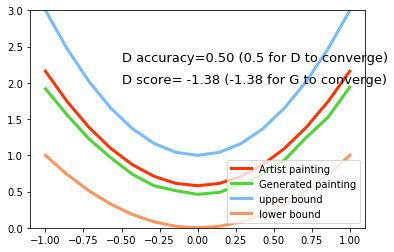

5150


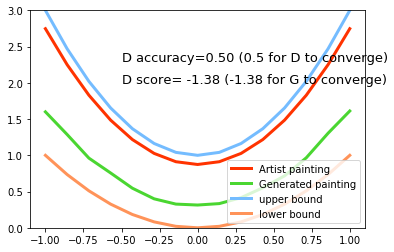

5200


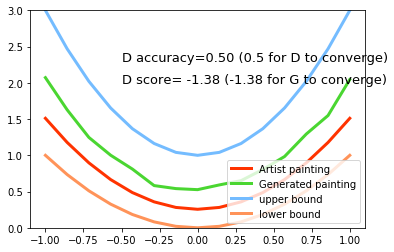

5250


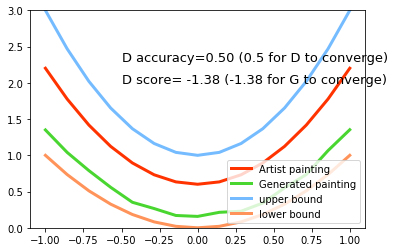

5300


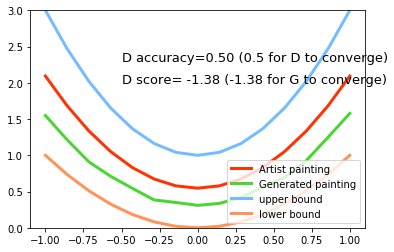

5350


5400


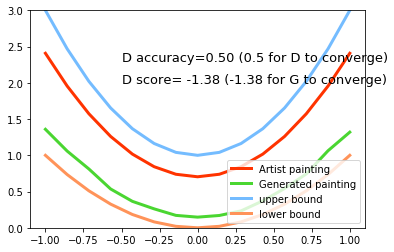

5450


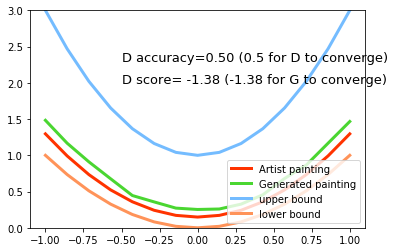

5500


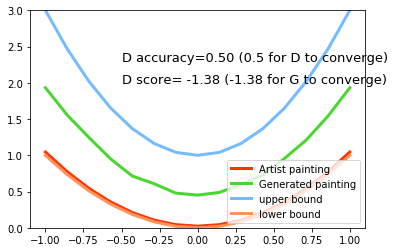

5550


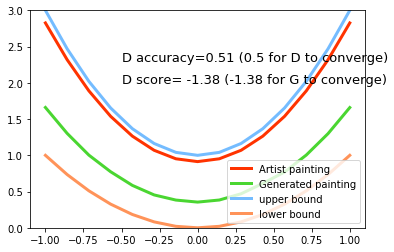

5600


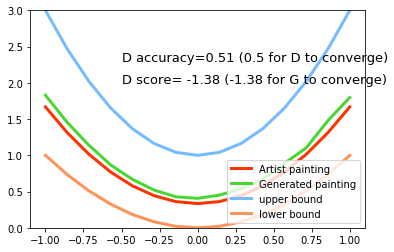

5650


5700


5750


5800


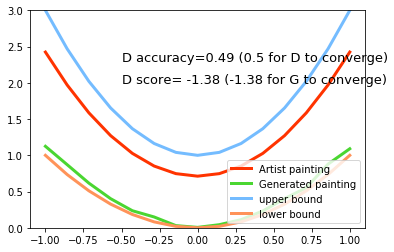

5850


5900


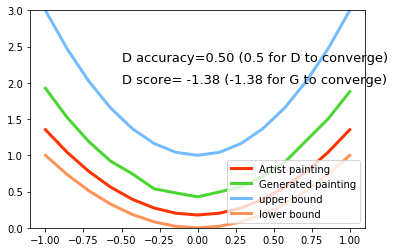

5950


6000


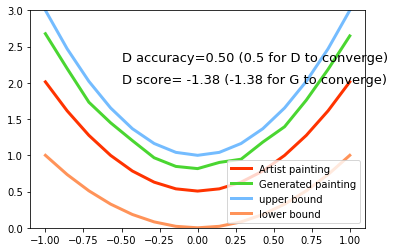

6050


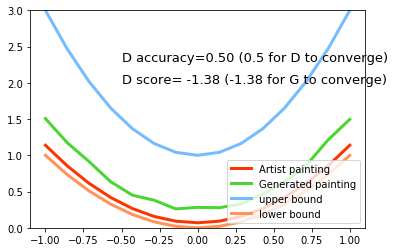

6100


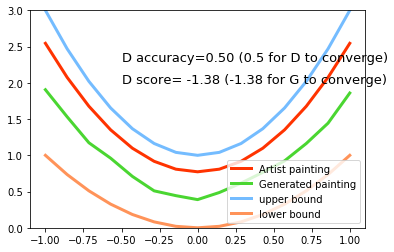

6150


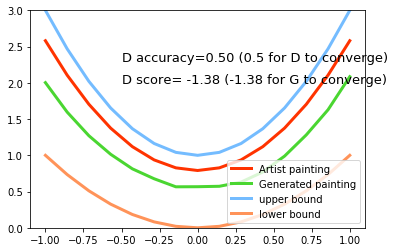

6200


6250


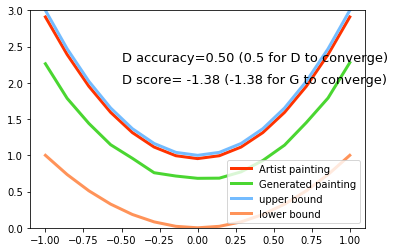

6300


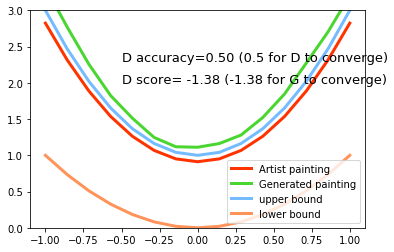

6350


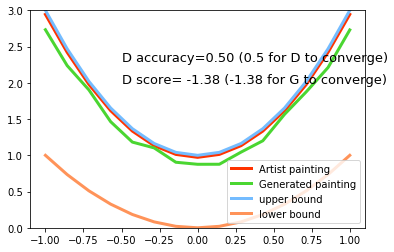

6400


6450


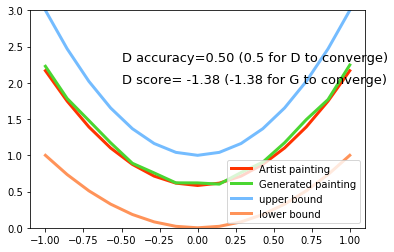

6500


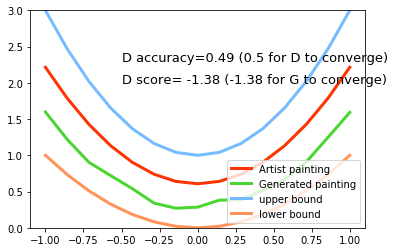

6550


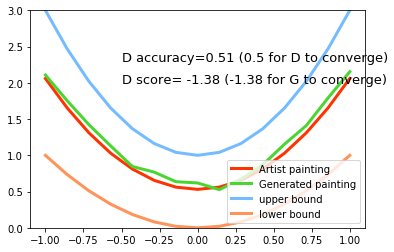

6600


6650


6700


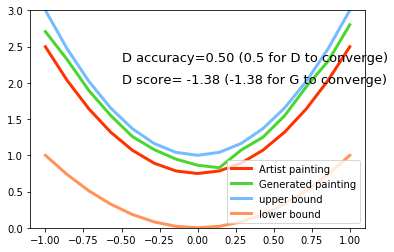

6750


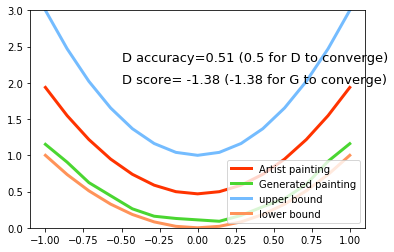

6800


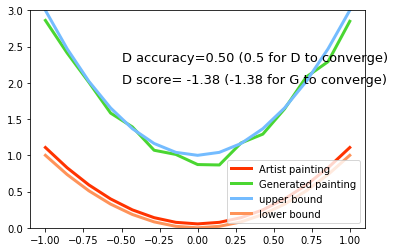

6850


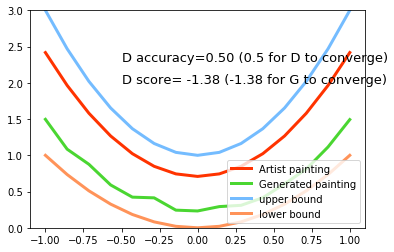

6900


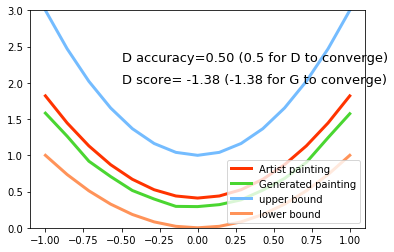

6950


7000


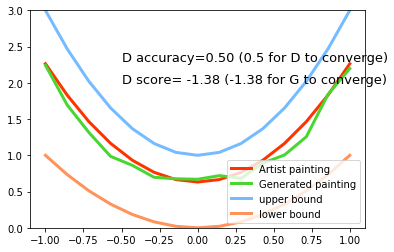

7050


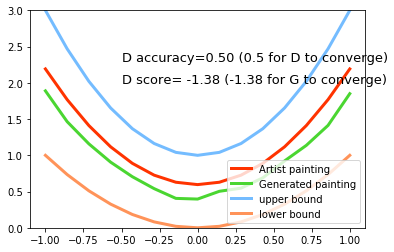

7100


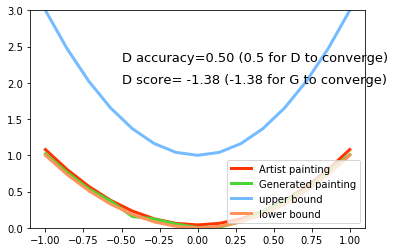

7150


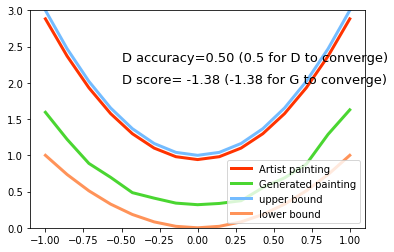

7200


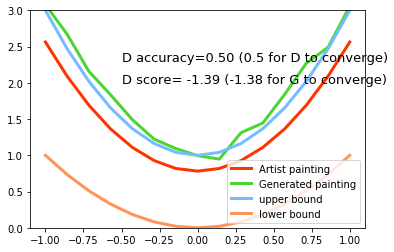

7250


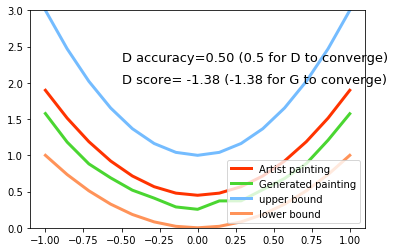

7300


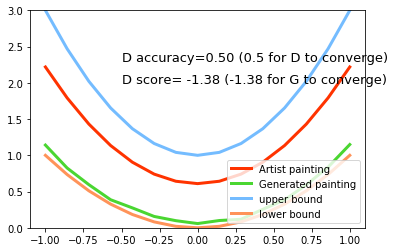

7350


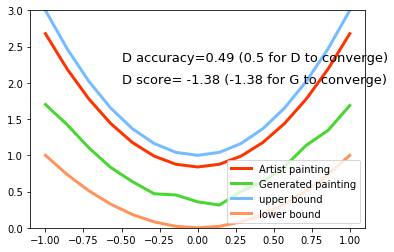

7400


7450


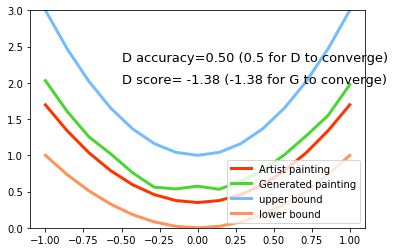

7500


7550


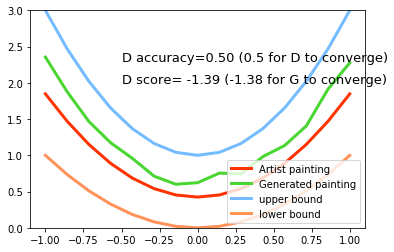

7600


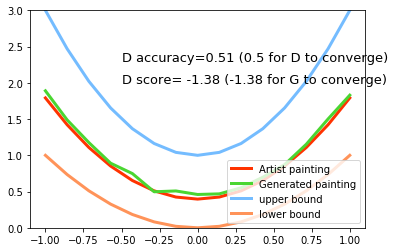

7650


7700


7750


7800


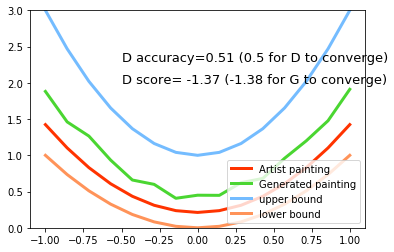

7850


7900


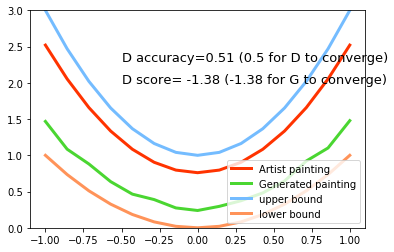

7950


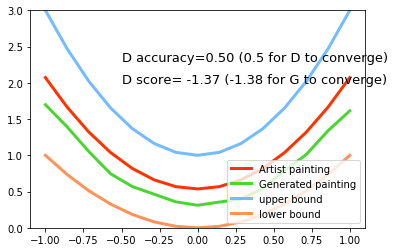

8000


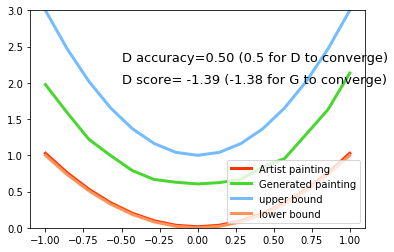

8050


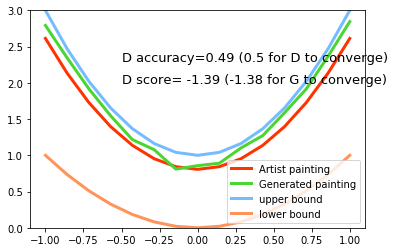

8100


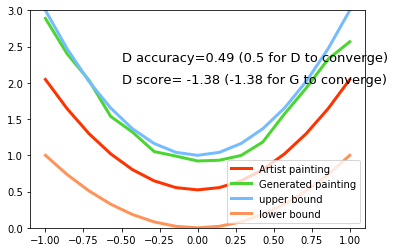

8150


8200


8250


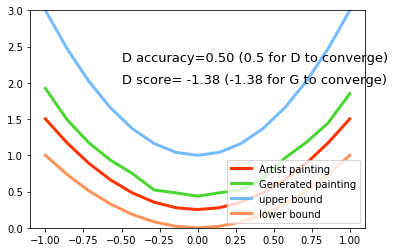

8300


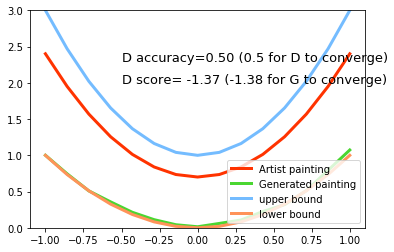

8350


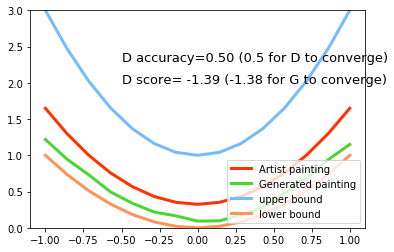

8400


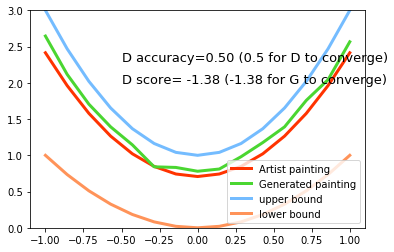

8450


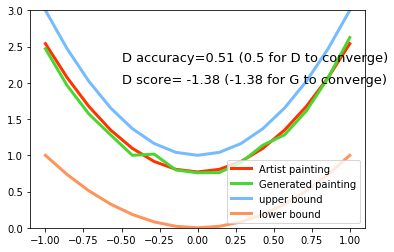

8500


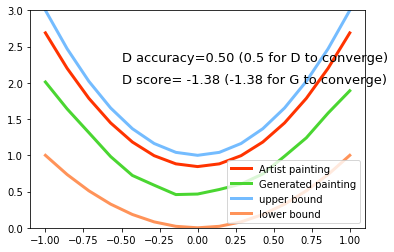

8550


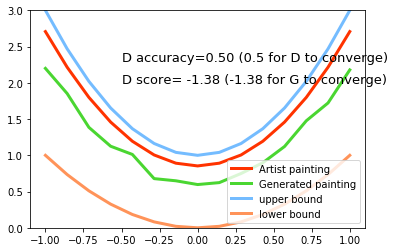

8600


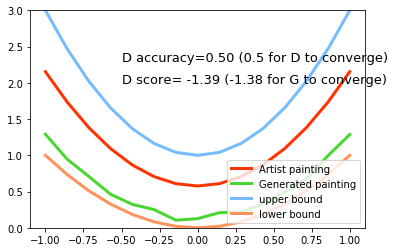

8650


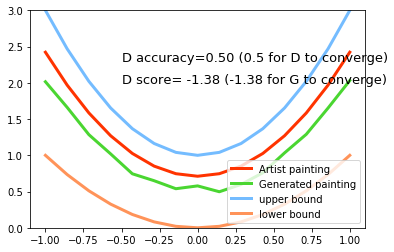

8700


8750


8800


8850


8900


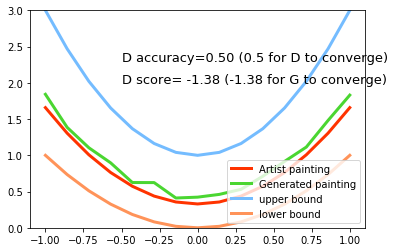

8950


9000


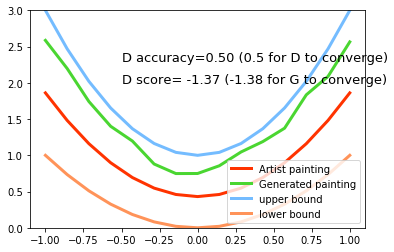

9050


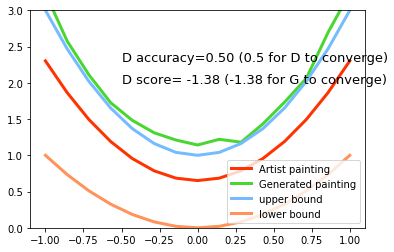

9100


9150


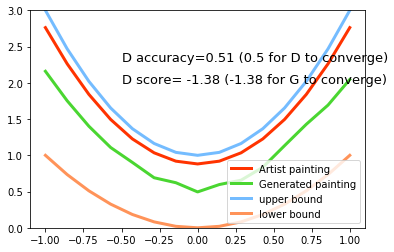

9200


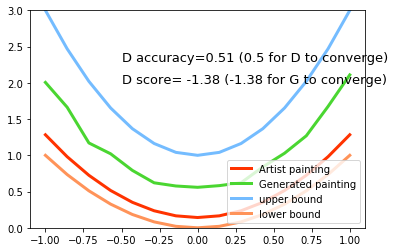

9250


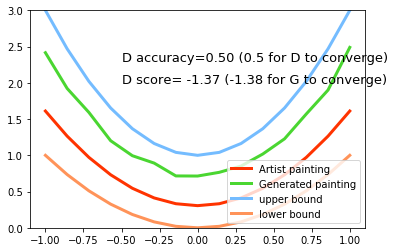

9300


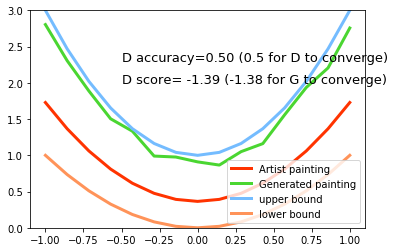

9350


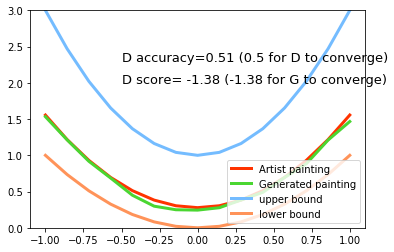

9400


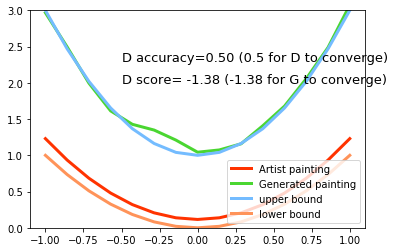

9450


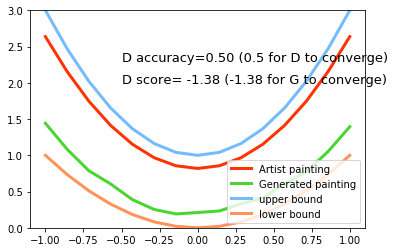

9500


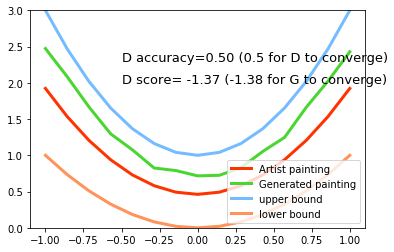

9550


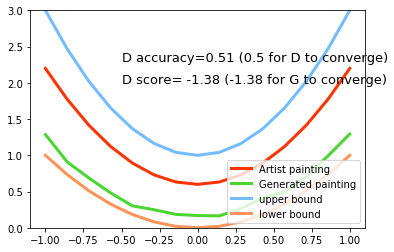

9600


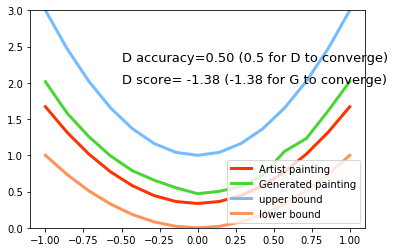

9650


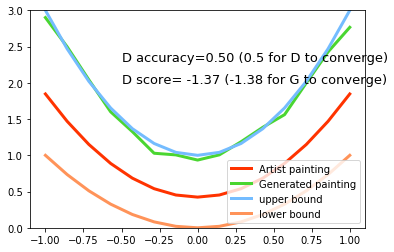

9700


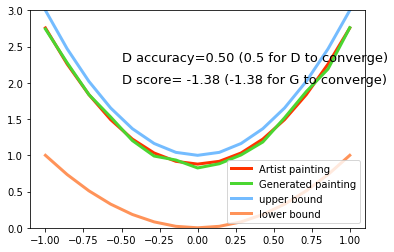

9750


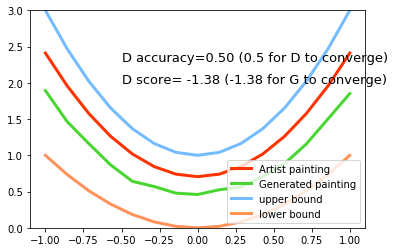

9800


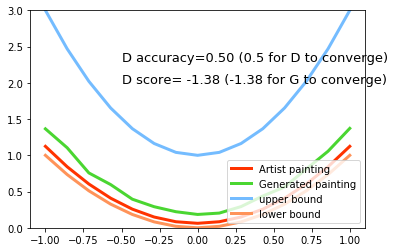

9850


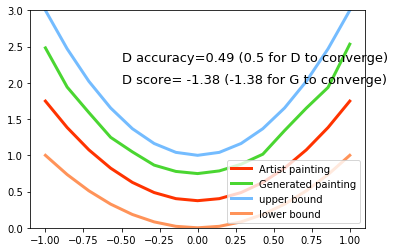

9900


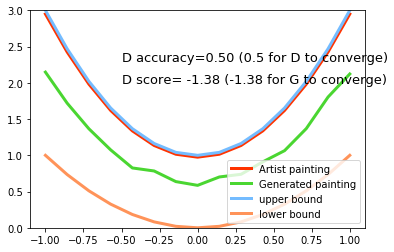

9950


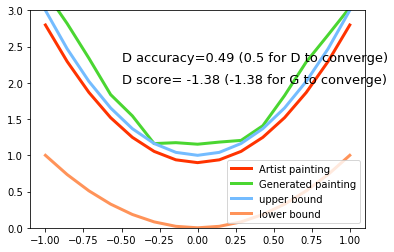

10000


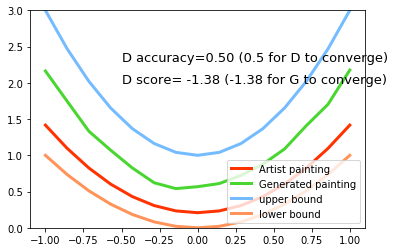

In [10]:
# train
for step in range(10001):
    artist_paintings = artist_works()                                                    # real painting from artist
    G_ideas = torch.randn(args['batch_size'], args['num_ideas'])  # random ideas
    G_paintings = G(G_ideas)                                                                 # fake painting from G (random ideas)
    
    prob_artist0 = D(artist_paintings)        # to increase
    prob_artist1 = D(G_paintings)                # to reduce
    
    D_loss = -torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
#     G_loss = torch.mean(torch.log(1. - prob_artist1))
    G_loss = -torch.mean(torch.log(prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)   # reusing computational graph
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    if step % 50 == 0:
        print(step)
        plt.cla()
        plt.plot(PAINT_POINTS[0], artist_paintings.data.numpy()[0], c='#ff3300', lw=3, label='Artist painting',)
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3))
        plt.legend(loc='lower right', fontsize=10)
        plt.draw()
        plt.pause(0.01)

plt.ioff()
plt.show()